In [1]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [2]:
#load data
digit = pd.read_csv('MNIST.csv')
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#shape
digit.shape

(42000, 785)

### Let's check about missing values

In [4]:
digit.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

there is no any missing values

In [5]:
#let's seprate the target variable
y = digit['label'].values
del digit['label']

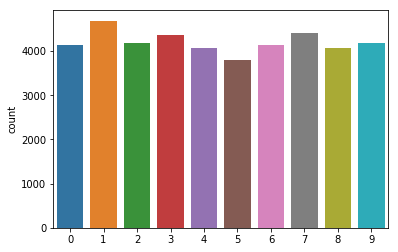

In [8]:
#count plot of target variable
sb.countplot(y)
plt.show()

In [6]:
#Normalization
digit = digit/255.0

In [9]:
#Reshape the data
X = digit.values.reshape(len(digit), 28, 28, 1)

In [10]:
#Converting target to categorical features
from keras.utils.np_utils import to_categorical
y = to_categorical(y)

Using TensorFlow backend.


In [11]:
y  #categorical formate

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [13]:
#split the data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

## Train the CNN model

In [14]:
#import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [15]:
#train model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(200))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [16]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
#summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
__________

In [18]:
#fitting the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 53s 2ms/step - loss: 0.2613 - acc: 0.9181 - val_loss: 0.0878 - val_acc: 0.9750
Epoch 2/50
33600/33600 [==============================] - 69s 2ms/step - loss: 0.0989 - acc: 0.9692 - val_loss: 0.0649 - val_acc: 0.9812
Epoch 3/50
33600/33600 [==============================] - 67s 2ms/step - loss: 0.0759 - acc: 0.9751 - val_loss: 0.0555 - val_acc: 0.9832
Epoch 4/50
33600/33600 [==============================] - 68s 2ms/step - loss: 0.0677 - acc: 0.9785 - val_loss: 0.0572 - val_acc: 0.9825
Epoch 5/50
33600/33600 [==============================] - 70s 2ms/step - loss: 0.0595 - acc: 0.9800 - val_loss: 0.0530 - val_acc: 0.9849
Epoch 6/50
33600/33600 [==============================] - 71s 2ms/step - loss: 0.0572 - acc: 0.9817 - val_loss: 0.0479 - val_acc: 0.9869
Epoch 7/50
33600/33600 [==============================] - 77s 2ms/step - loss: 0.0544 - acc: 0.9826 - val_loss: 0.0518 - val_acc:

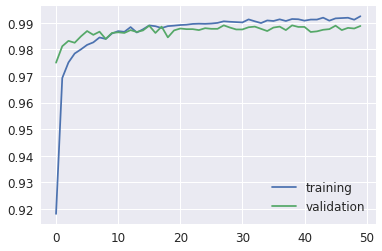

In [30]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

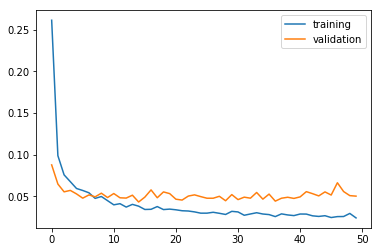

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [21]:
#Predicting test data
y_pred = model.predict_classes(X_test)

In [24]:
#Arrange
y_test_cls = np.argmax(y_test, axis=1)

In [25]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test_cls)

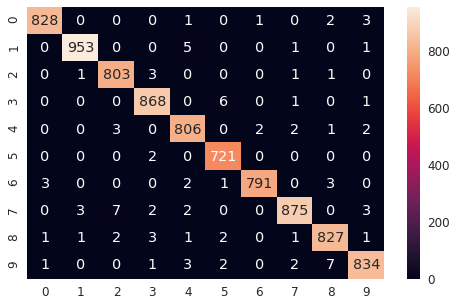

In [29]:
plt.figure(figsize=(8, 5))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [27]:
# Evaluate data
score = model.evaluate(X_test, y_test)
print('Accuracy : ', score[1]*100)

8400/8400 [==============================] - 4s 432us/step
Accuracy :  98.880952381
